In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Cardiovascular_Disease_Dataset.csv')

In [ ]:
data.head(3)

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [ ]:
data.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [ ]:
data.isnull().sum()

,0
patientid,0
age,0
gender,0
chestpain,0
restingBP,0
serumcholestrol,0
fastingbloodsugar,0
restingrelectro,0
maxheartrate,0
exerciseangia,0


In [ ]:
def count_outliers(df, threshold=3):
  z_scores = np.abs((df - df.mean()) / df.std())
  outlier_counts = (z_scores > threshold).sum()
  return outlier_counts
outlier_counts = count_outliers(data)
print(outlier_counts)

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64


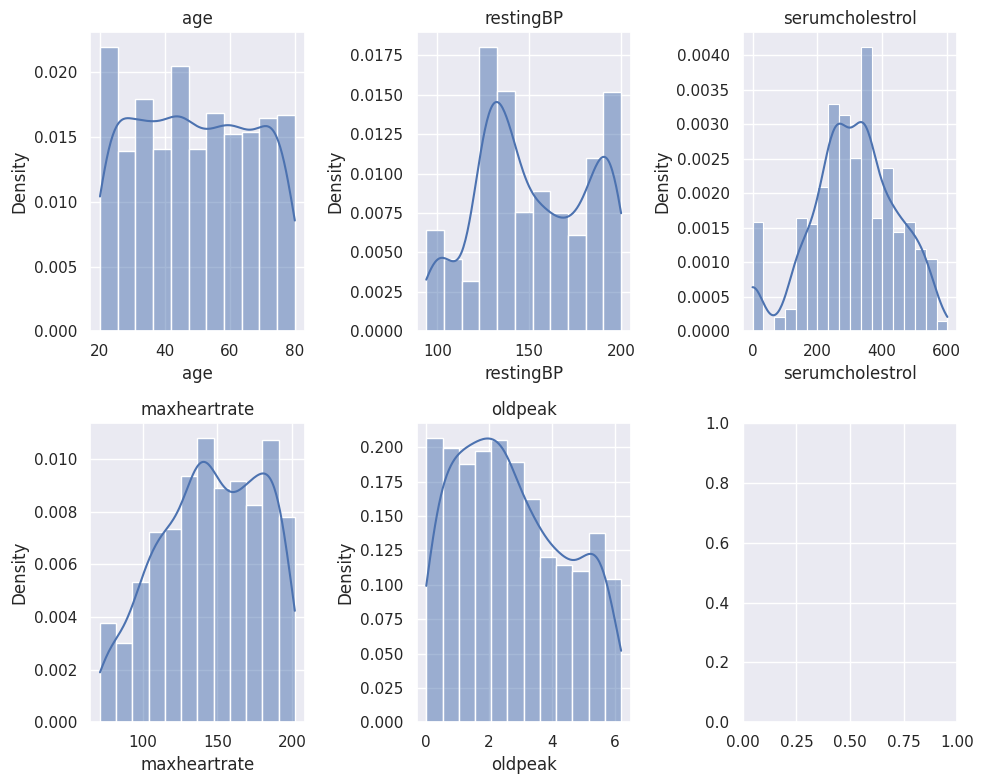

In [ ]:
from scipy.stats import norm
df = data[['age','restingBP','serumcholestrol','maxheartrate','oldpeak']]
df = pd.DataFrame(df)
def plot_hist_with_curve(data):
  num_cols = data.select_dtypes(include=['float64', 'int64']).columns
  num_rows = int(np.ceil(len(num_cols) / 3))
  fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(10, 4 * num_rows))
  axes = axes.flatten()

  for i, col in enumerate(num_cols):
    ax = axes[i]
    sns.histplot(data[col], kde=True, ax=ax, stat='density')
    ax.set_title(col)

  plt.tight_layout()
  plt.show()

# Pass the DataFrame 'data' directly to the function
plot_hist_with_curve(df)

In [ ]:
target_counts=data['target'].value_counts()
target_counts

,count
target,
1,580
0,420


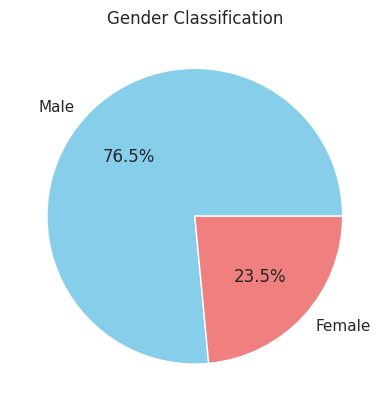

In [ ]:
plt.pie(gender_count,labels=['Male', 'Female'],autopct='%1.1f%%',colors = ['skyblue', 'lightcoral']);
plt.title('Gender Classification');

In [ ]:
gender_count = data['gender'].value_counts()
print(gender_count)


gender
1    765
0    235
Name: count, dtype: int64


In [ ]:
fast_count = data['fastingbloodsugar'].value_counts()
print(fast_count)

fastingbloodsugar
0    704
1    296
Name: count, dtype: int64


In [ ]:
exercise_count = data['exerciseangia'].value_counts()
print(exercise_count)

exerciseangia
0    502
1    498
Name: count, dtype: int64


In [ ]:
pivot_table = data.pivot_table(index='gender', columns='target', aggfunc='size', fill_value=0)
print(pivot_table)

target    0    1
gender          
0       102  133
1       318  447


In [ ]:
chest_pain = data['chestpain'].value_counts()
print(chest_pain)

chestpain
0    420
2    312
1    224
3     44
Name: count, dtype: int64


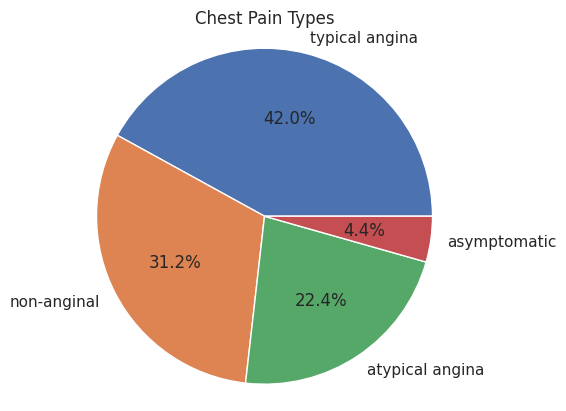

In [ ]:
chest_pain_counts = data['chestpain'].value_counts()

# Use the index (chest pain types) as labels
plt.pie(chest_pain_counts, labels=['typical angina','non-anginal','atypical angina','asymptomatic'], autopct='%1.1f%%')
plt.title('Chest Pain Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

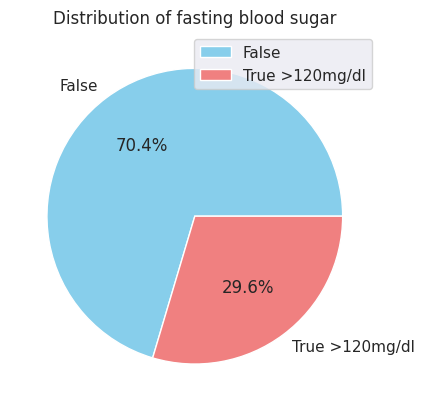

In [ ]:
g = data['fastingbloodsugar'].value_counts()
gender_labels = {1: 'True >120mg/dl', 0: 'False'}
g.index = g.index.map(gender_labels)

colors = ['skyblue', 'lightcoral']
plt.pie(g, labels=g.index, autopct='%1.1f%%', colors=colors)
plt.legend()
plt.title('Distribution of fasting blood sugar')
plt.show()

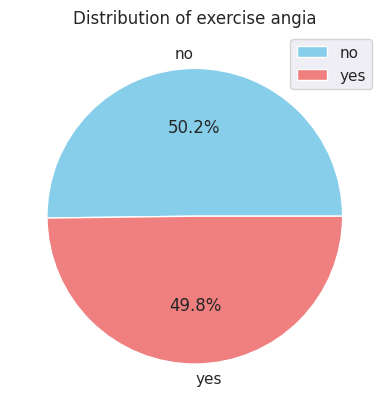

In [ ]:
e = data['exerciseangia'].value_counts()
gender_labels = {1: 'yes', 0: 'no'}
e.index = e.index.map(gender_labels)

colors = ['skyblue', 'lightcoral']
plt.pie(e, labels=e.index, autopct='%1.1f%%', colors=colors)
plt.legend()
plt.title('Distribution of exercise angia')
plt.show()

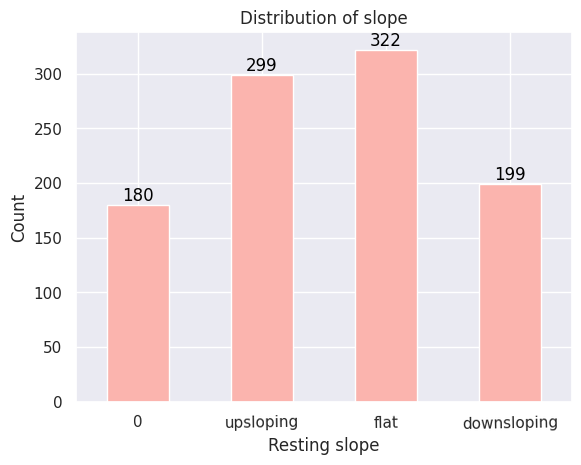

In [ ]:
slope_labels = {0:'0',1: 'upsloping', 2: 'flat',3:'downsloping'}
re= data['slope'].value_counts().sort_index().plot(kind='bar', color=plt.cm.Pastel1(0))

for p in re.patches:
    re.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

re.set_xticklabels([slope_labels[i] for i in re.get_xticks()], rotation=1)

plt.title('Distribution of slope')
plt.xlabel('Resting slope')
plt.ylabel('Count')
plt.show()

In [ ]:
pivot_table = data.pivot_table(index=['chestpain','exerciseangia'], columns='gender', values='target', aggfunc='sum',margins = True)
print(pivot_table)

gender                     0    1  All
chestpain exerciseangia               
0         0               14   40   54
          1               21   33   54
1         0               19   66   85
          1               18   51   69
2         0               18  122  140
          1               28  111  139
3         0                7   15   22
          1                8    9   17
All                      133  447  580


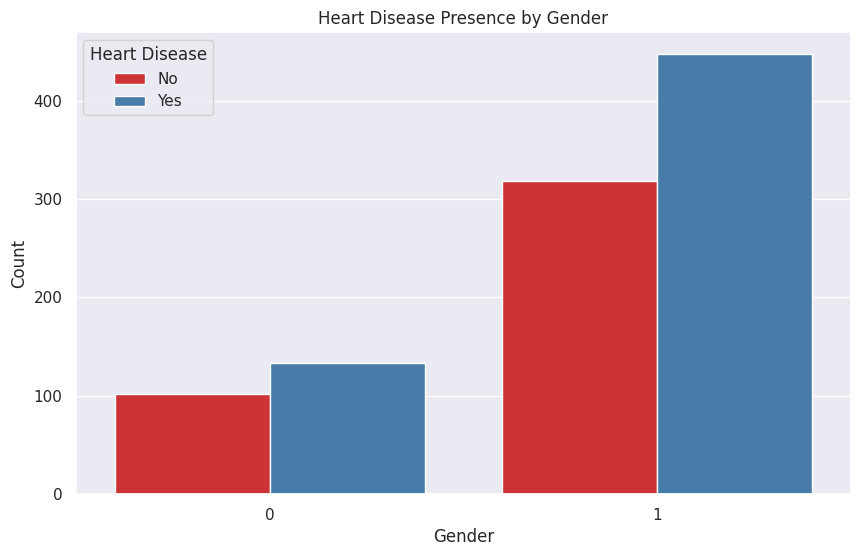

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='target', data=data, palette='Set1')
plt.title('Heart Disease Presence by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

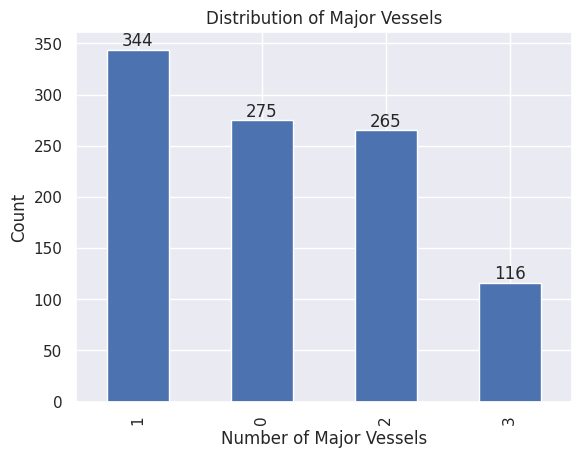

In [ ]:
vessel_counts = data['noofmajorvessels'].value_counts()
ax = vessel_counts.plot(kind='bar')  # Remove autopct argument

plt.title('Distribution of Major Vessels')

# Add count labels manually
total = vessel_counts.sum()
for p in ax.patches:
    count = int(p.get_height())  # Get height as integer (count)
    x = p.get_x() + p.get_width() / 2  # Center position
    y = p.get_height()  # Top of the bar
    ax.annotate(str(count), (x, y), ha='center', va='bottom')  # Annotate with count
plt.xlabel('Number of Major Vessels')
plt.ylabel('Count')
plt.show()


<ipython-input-33-9640c29b2816>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='chestpain', y='maxheartrate', data=data, palette='viridis')


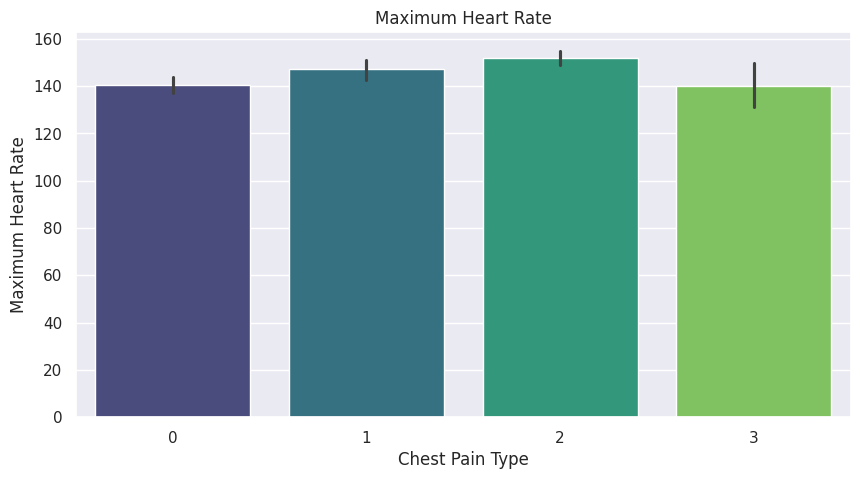

In [ ]:
plt.figure(figsize=(10, 5),facecolor='white')
sns.barplot(x='chestpain', y='maxheartrate', data=data, palette='viridis')
plt.title('Maximum Heart Rate')
plt.xlabel('Chest Pain Type')
plt.ylabel('Maximum Heart Rate')
plt.show()

In [ ]:
percentage_high_fasting_sugar = (data['fastingbloodsugar'].sum() / len(data)) * 100
print(f"Percentage of patients with fasting blood sugar > 120 mg/dl: {percentage_high_fasting_sugar:.2f}%")

Percentage of patients with fasting blood sugar > 120 mg/dl: 29.60%


<ipython-input-35-d999e9d42413>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='slope', data=data, palette='Set1')


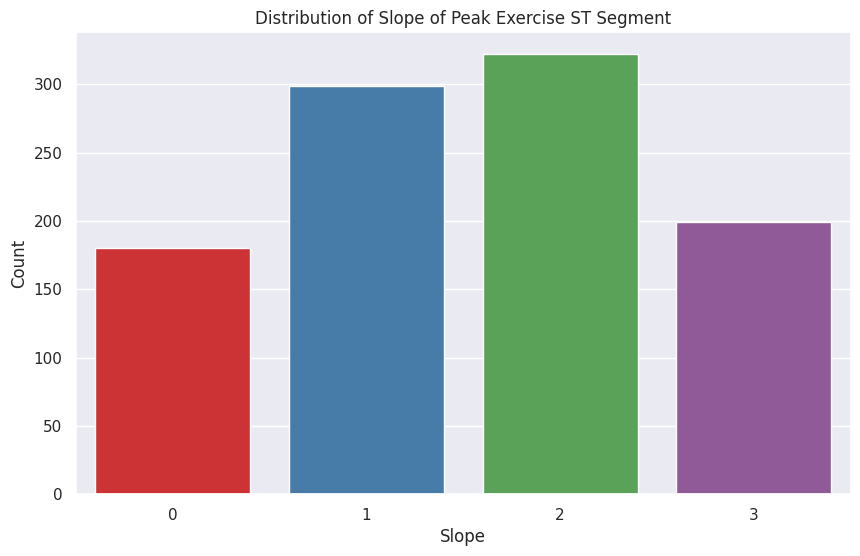

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='slope', data=data, palette='Set1')
plt.title('Distribution of Slope of Peak Exercise ST Segment')
plt.xlabel('Slope')
plt.ylabel('Count')
plt.show()

**Data Splitting**

In [ ]:
# Spliting data
X=data.drop(['patientid','target'],axis=1)
X.columns

Index(['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol',
       'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia',
       'oldpeak', 'slope', 'noofmajorvessels'],
      dtype='object')

In [ ]:
y=data['target']
patientid=data['patientid']

In [ ]:
# Test_train_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y, patientid, test_size=0.2, random_state=42)

**Logistic Regression**



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
hyperparameters = {
    'penalty': 'l2',
    'solver': 'lbfgs',  # Solver algorithm
    'max_iter': 100  # number of iterations
}
model_log = LogisticRegression(**hyperparameters)
result_log=model_log.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_log_pred = model_log.predict(X_test)
print(y_log_pred)
accuracy = accuracy_score(y_test, y_log_pred)
print(f"Accuracy: {accuracy:.2f}")

[1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1
 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1
 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1
 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0
 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1]
Accuracy: 0.94


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_log_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        83
           1       0.93      0.97      0.95       117

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



In [ ]:
# Estimated coffecient for the regression model
from sklearn import metrics
import statsmodels.api as sm
logit_model = sm.Logit(y_train, X_train)
result_smlog = logit_model.fit()

print(result_smlog.summary())

Optimization terminated successfully.
         Current function value: 0.163530
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  800
Model:                          Logit   Df Residuals:                      788
Method:                           MLE   Df Model:                           11
Date:                Sun, 22 Sep 2024   Pseudo R-squ.:                  0.7598
Time:                        15:43:47   Log-Likelihood:                -130.82
converged:                       True   LL-Null:                       -544.55
Covariance Type:            nonrobust   LLR p-value:                2.402e-170
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                  -0.0344      0.009     -3.964      0.000      -0.051      -0.017
gender  

In [ ]:
smlog_pred=result_smlog.predict(X_test)
smlog_pred_binary = (smlog_pred >= 0.5).astype(int)
accuracy_logit = accuracy_score(y_test, smlog_pred_binary)
print("Accuracy:", accuracy_logit)

Accuracy: 0.93


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
auc_score = roc_auc_score(y_test, smlog_pred_binary)
auc_score

0.9209144269385233

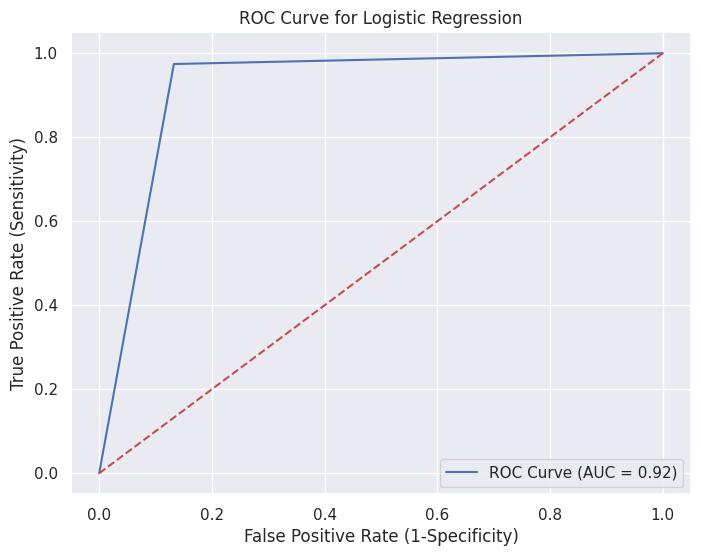

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, smlog_pred_binary)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

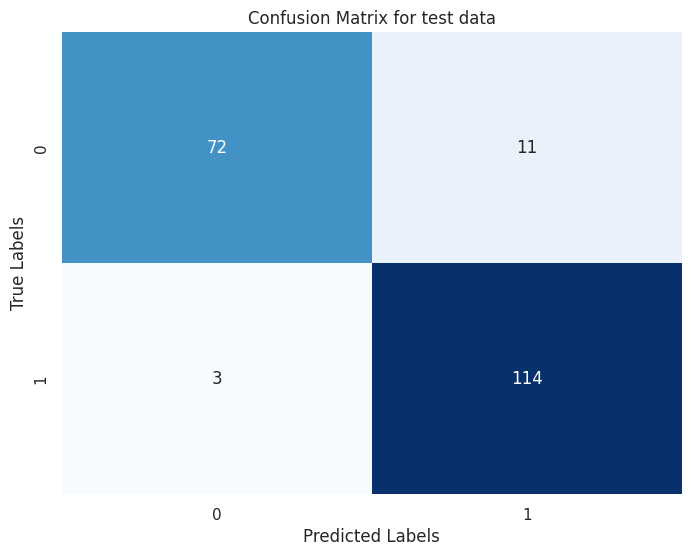

In [ ]:
from sklearn.metrics import confusion_matrix
cmlg = confusion_matrix(y_test, smlog_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cmlg, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test data')
plt.show()

**Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

**Descision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor()
dt_reg.fit(X_train_scaled,y_train)

DecisionTreeRegressor
DecisionTreeRegressor()
ypred_dt=dt_reg.predict(X_test_scaled)
from sklearn.metrics import mean_squared_error
pred_dt = dt_reg.predict(X_test_scaled)
pred_list_dt = pd.DataFrame({'patientid': id_test, 'actual_target': y_test, 'predicted_target': pred_dt})
print(pred_list_dt.dropna())

     patientid  actual_target  predicted_target
521    5125568              1               1.0
737    7527664              0               0.0
740    7585452              0               0.0
660    6781392              0               0.0
411    4102655              1               1.0
..         ...            ...               ...
408    4074097              1               1.0
332    3245660              0               0.0
208    2104974              0               0.0
613    6231193              1               1.0
78      914670              1               1.0

[200 rows x 3 columns]


In [ ]:
print("Classification Report:")
print(classification_report(y_test, ypred_dt))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        83
           1       0.96      0.97      0.97       117

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [ ]:
accuracy_score(y_test, ypred_dt)

0.96

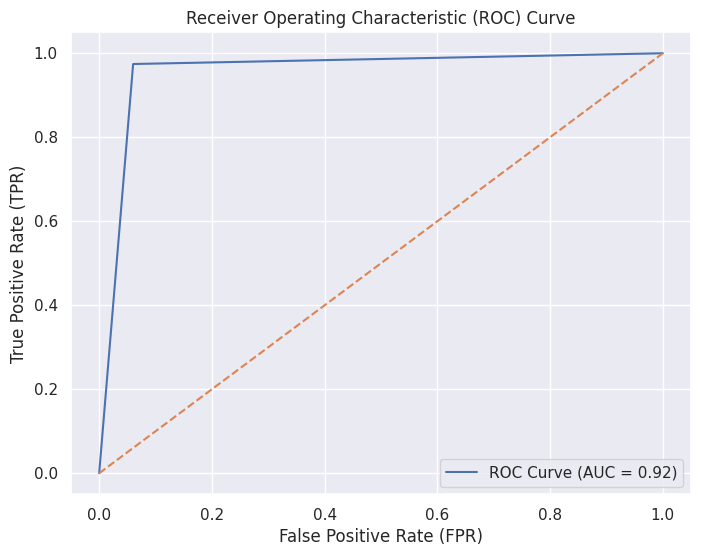

In [ ]:
fpr_ds, tpr_ds, thresholds = roc_curve(y_test, ypred_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr_ds, tpr_ds, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

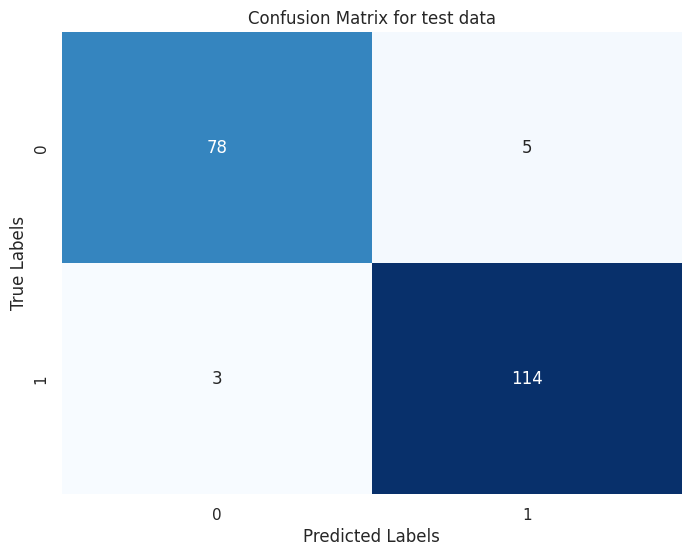

In [ ]:
from sklearn.metrics import confusion_matrix

cmdt = confusion_matrix(y_test, ypred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cmdt, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test data')
plt.show()

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_scaled, y_train)
ypred_rf = rf_reg.predict(X_test_scaled)
ypred_rf_binary=(ypred_rf > 0.5).astype(int)

In [ ]:
print("Classification Report:")
print(classification_report(y_test, ypred_rf_binary))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        83
           1       0.97      0.98      0.97       117

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



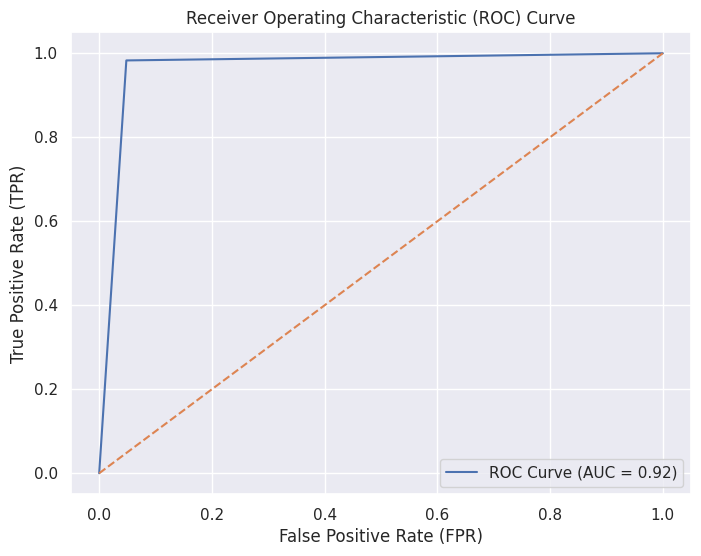

In [ ]:
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, ypred_rf_binary)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


accuracy: 0.97


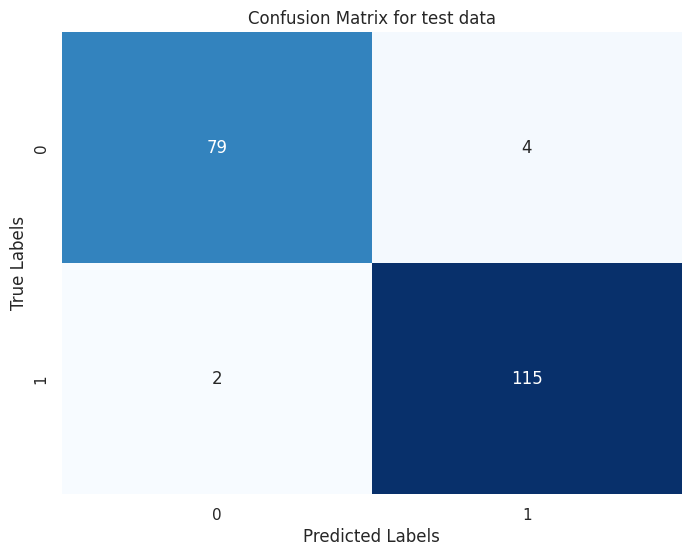

In [ ]:
accr = accuracy_score(y_test, ypred_rf_binary)
print("accuracy:", accr)
cmrf = confusion_matrix(y_test, ypred_rf_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cmrf, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for test data')
plt.show()

**SVM**

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train_scaled, y_train)

SVC
SVC()

SVC()

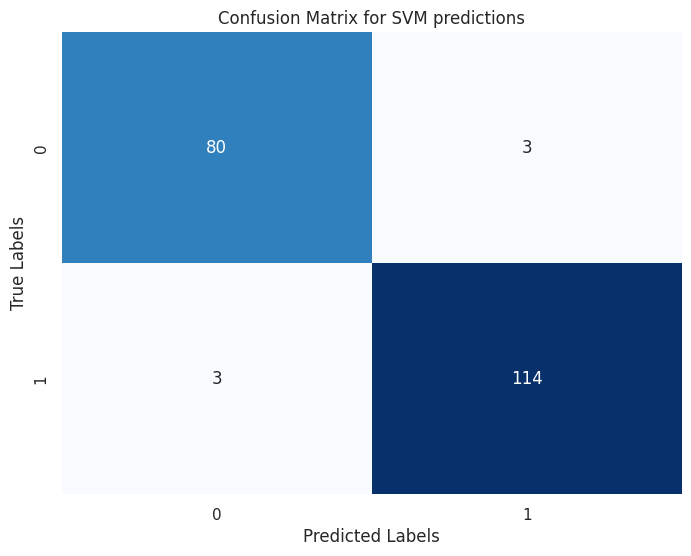

In [ ]:
ypred_svm = svm_clf.predict(X_test_scaled)
ypred_svm_binary = (ypred_svm > 0.5).astype(int)
cmsvm = confusion_matrix(y_test, ypred_svm_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cmsvm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM predictions')
plt.show()

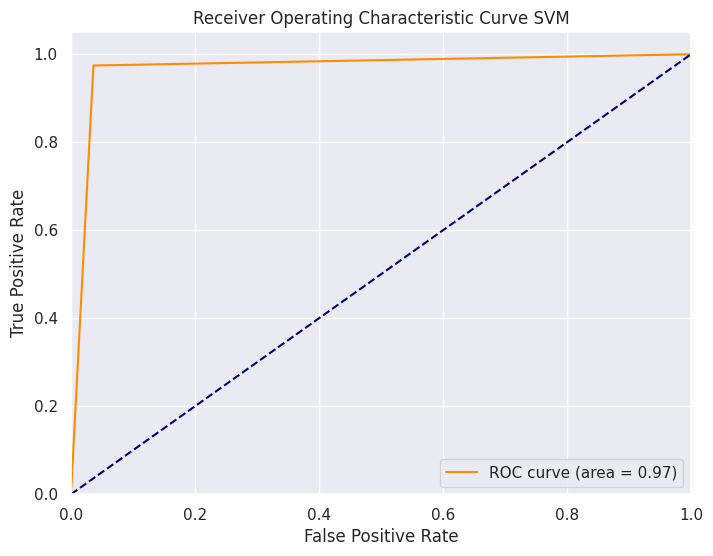

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, ypred_svm_binary)
auc = roc_auc_score(y_test, ypred_svm_binary)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve SVM')
plt.legend(loc="lower right")
plt.show()


In [ ]:
accuracy_score(y_test, ypred_svm_binary)

0.97

In [ ]:
print("Classification Report:")
print(classification_report(y_test, ypred_svm_binary))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        83
           1       0.97      0.97      0.97       117

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
ypred_knn = knn_clf.predict(X_test_scaled)
accuracy_score(y_test, ypred_knn)

0.935

In [ ]:
print("Classification Report:")
print(classification_report(y_test, ypred_knn))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        83
           1       0.95      0.94      0.94       117

    accuracy                           0.94       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.94      0.94      0.94       200



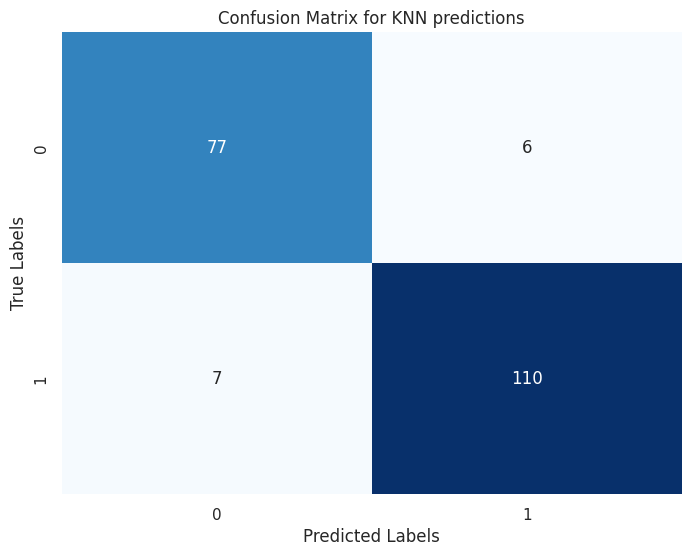

In [ ]:
cmknn = confusion_matrix(y_test, ypred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cmknn, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for KNN predictions')
plt.show()

**XGBoost**

In [ ]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred_XG = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_XG)
print("Accuracy:", accuracy)


Accuracy: 0.965


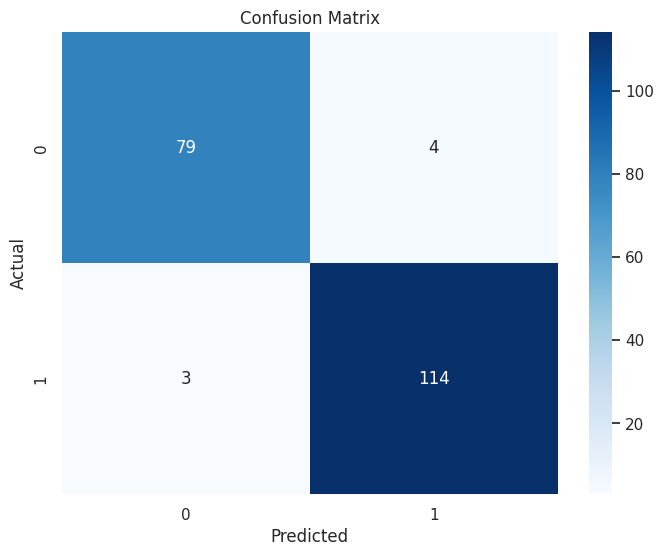

In [ ]:
classification_rep = classification_report(y_test, y_pred_XG)
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred_XG)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Comparing Models**

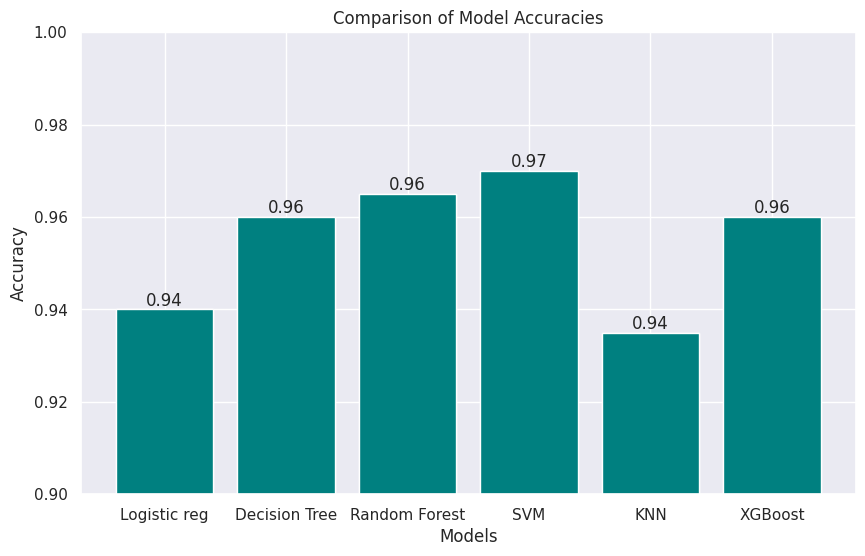

In [ ]:
accuracies = {
    "Logistic reg": 0.94,
    "Decision Tree":.96,
    'Random Forest': 0.965,
    'SVM': 0.97,
    'KNN': 0.935,
    'XGBoost': 0.96
}

models = list(accuracies.keys())
accuracy_values = list(accuracies.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(models,accuracy_values, color='teal')
plt.bar(models,accuracy_values, color='teal')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.9, 1.0)
plt.bar_label(bars, [f"{accuracy:.2f}" for accuracy in accuracy_values])
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
accuracy_score = [accuracy_score(y_test, y_log_pred),accuracy_score(y_test, ypred_dt),accuracy_score(y_test, ypred_rf_binary),accuracy_score(y_test, ypred_knn),accuracy_score(y_test, ypred_svm_binary),accuracy_score(y_test, y_pred_XG)]

precision_score = [precision_score(y_test, y_log_pred),precision_score(y_test,  ypred_dt),precision_score(y_test, ypred_rf_binary),precision_score(y_test, ypred_knn),precision_score(y_test, ypred_svm_binary),precision_score(y_test, y_pred_XG)]

recall_score = [recall_score(y_test, y_log_pred),recall_score(y_test,  ypred_dt),recall_score(y_test, ypred_rf_binary),recall_score(y_test, ypred_knn),recall_score(y_test, ypred_svm_binary),recall_score(y_test, y_pred_XG) ]

f1_score = [f1_score(y_test, y_log_pred),f1_score(y_test,  ypred_dt),f1_score(y_test, ypred_rf_binary),f1_score(y_test, ypred_knn),f1_score(y_test, ypred_svm_binary), f1_score(y_test, y_pred_XG)]

roc_auc_score = [roc_auc_score(y_test, y_log_pred),roc_auc_score(y_test,  ypred_dt),roc_auc_score(y_test, ypred_rf_binary),roc_auc_score(y_test, ypred_knn),roc_auc_score(y_test, ypred_svm_binary),roc_auc_score(y_test, y_pred_XG) ]


col={'accuracy':accuracy_score, 'precision':precision_score, 'recall':recall_score, 'f1_score':f1_score,'roc_auc_score':roc_auc_score}
models=['Logistic Regression','Descision Tree','Random Forest','KNN','SVM', 'XGBoost']
comp_after_threshold  = pd.DataFrame(data=col,index=models)
comp_after_threshold.round(2)

,accuracy,precision,recall,f1_score,roc_auc_score
Logistic Regression,0.94,0.93,0.97,0.95,0.94
Descision Tree,0.96,0.96,0.97,0.97,0.96
Random Forest,0.97,0.97,0.98,0.97,0.97
KNN,0.94,0.95,0.94,0.94,0.93
SVM,0.97,0.97,0.97,0.97,0.97
XGBoost,0.96,0.97,0.97,0.97,0.96


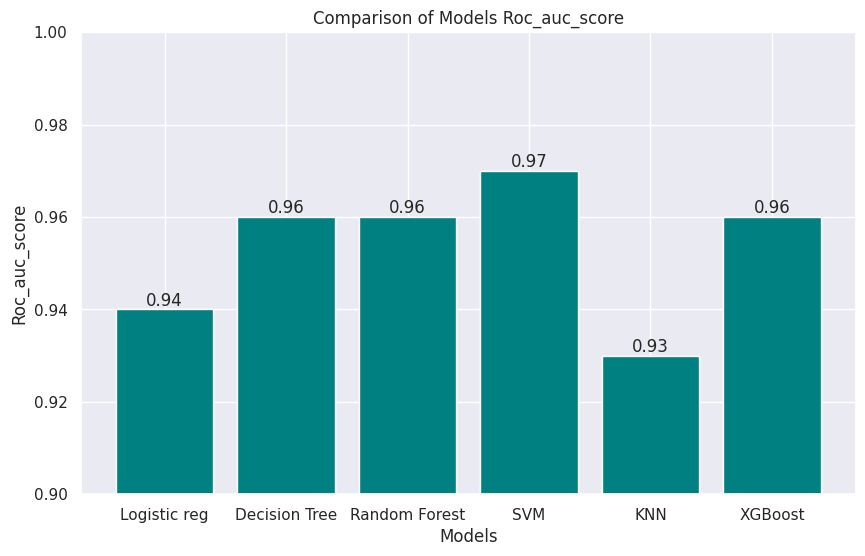

In [ ]:
roc_auc_score = {
    "Logistic reg": 0.94,
    "Decision Tree":.96,
    'Random Forest': 0.96,
    'SVM': 0.97,
    'KNN': 0.93,
    'XGBoost': 0.96
}

models = list(roc_auc_score.keys())
roc_auc_score_values = list(roc_auc_score.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(models,roc_auc_score_values, color='teal')
plt.bar(models,roc_auc_score_values, color='teal')
plt.xlabel('Models')
plt.ylabel('Roc_auc_score')
plt.title('Comparison of Models Roc_auc_score')
plt.ylim(0.9, 1.0)
plt.bar_label(bars, [f"{accuracy:.2f}" for accuracy in roc_auc_score_values])
plt.show()

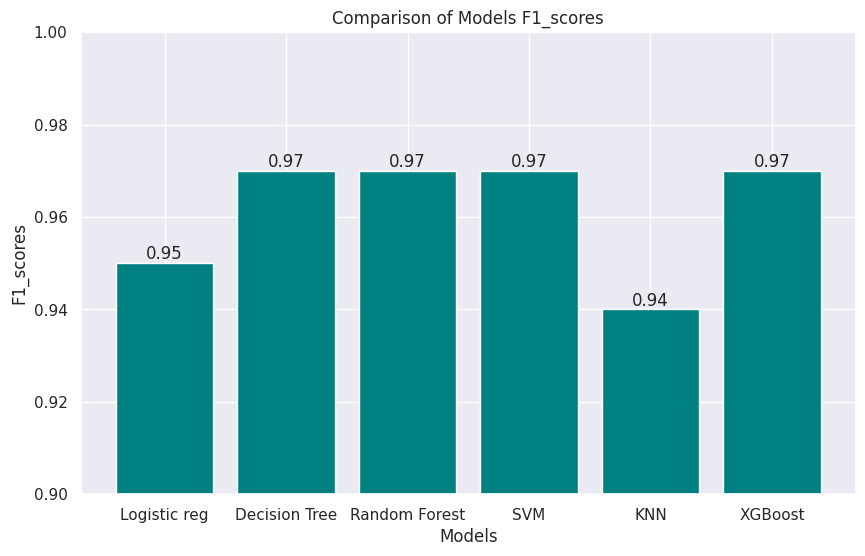

In [ ]:
f1 = {
    "Logistic reg": 0.95,
    "Decision Tree":.97,
    'Random Forest': 0.97,
    'SVM': 0.97,
    'KNN': 0.94,
    'XGBoost': 0.97
}

models = list(f1.keys())
f1_values = list(f1.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(models,f1_values, color='teal')
plt.bar(models,f1_values, color='teal')
plt.xlabel('Models')
plt.ylabel('F1_scores')
plt.title('Comparison of Models F1_scores')
plt.ylim(0.9, 1.0)
plt.bar_label(bars, [f"{accuracy:.2f}" for accuracy in f1_values])
plt.show()

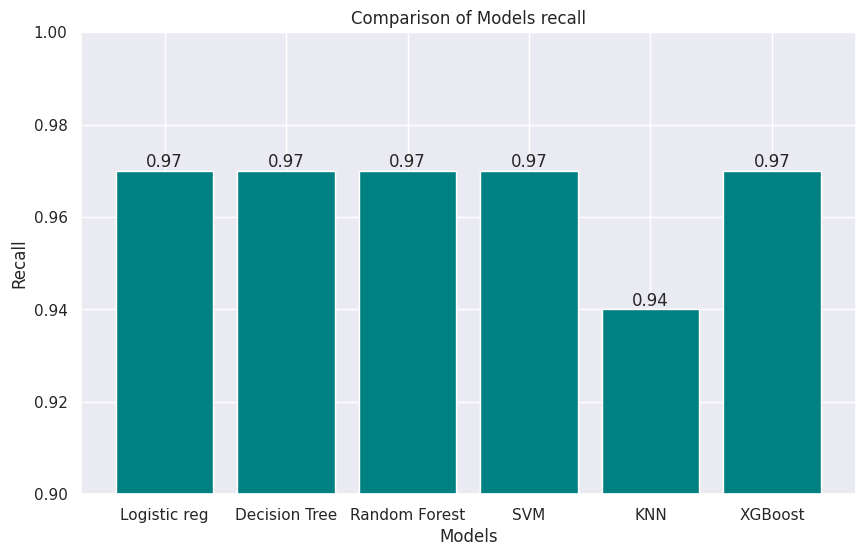

In [ ]:
recall = {
    "Logistic reg": 0.97,
    "Decision Tree":.97,
    'Random Forest': 0.97,
    'SVM': 0.97,
    'KNN': 0.94,
    'XGBoost': 0.97
}

models = list(recall.keys())
recall_values = list(recall.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(models,recall_values, color='teal')
plt.bar(models,recall_values, color='teal')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Comparison of Models recall')
plt.ylim(0.9, 1.0)
plt.bar_label(bars, [f"{accuracy:.2f}" for accuracy in recall_values])
plt.show()

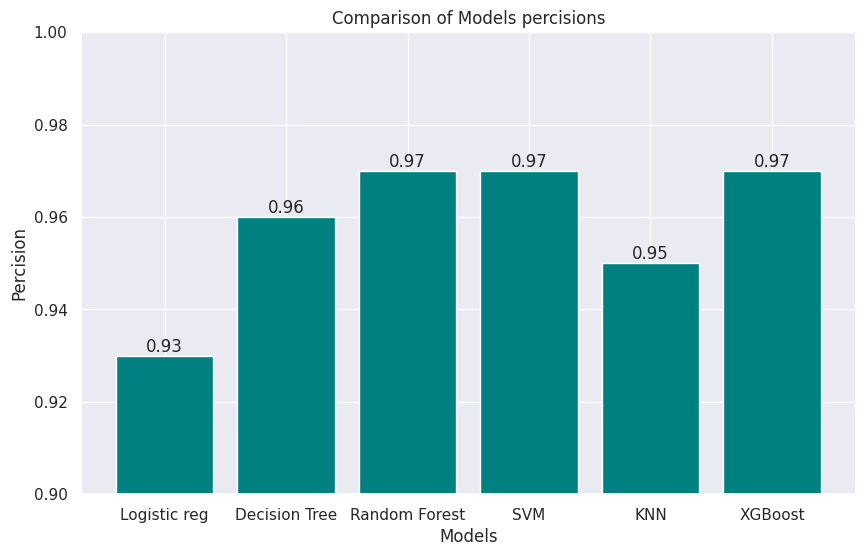

In [ ]:
percisions = {
    "Logistic reg": 0.93,
    "Decision Tree":.96,
    'Random Forest': 0.97,
    'SVM': 0.97,
    'KNN': 0.95,
    'XGBoost': 0.97
}

models = list(percisions.keys())
percision_values = list(percisions.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(models,percision_values, color='teal')
plt.bar(models,percision_values, color='teal')
plt.xlabel('Models')
plt.ylabel('Percision')
plt.title('Comparison of Models percisions')
plt.ylim(0.9, 1.0)
plt.bar_label(bars, [f"{accuracy:.2f}" for accuracy in percision_values])
plt.show()

In [ ]:
average_max_heart_rate = data['maxheartrate'].mean()
print(f"Average Maximum Heart Rate: {average_max_heart_rate:.2f}")

Average Maximum Heart Rate: 145.48


In [ ]:
exercise_angina_count = data['exerciseangia'].sum()
print(f"Number of Patients with Exercise-Induced Angina: {exercise_angina_count}")

Number of Patients with Exercise-Induced Angina: 498


In [ ]:
average_oldpeak = data['oldpeak'].mean()
print(f"Average Oldpeak: {average_oldpeak:.2f}")

Average Oldpeak: 2.71


In [ ]:
percentage_heart_disease = (data['target'].sum() / len(df)) * 100
print(f"Percentage of Patients with Heart Disease: {percentage_heart_disease:.2f}%")

Percentage of Patients with Heart Disease: 58.00%


In [ ]:
oldest_patient = data.loc[data['age'].idxmax()]
print(f"Details of the Oldest Patient:\n{oldest_patient}")

Details of the Oldest Patient:
patientid            1160678.0
age                       80.0
gender                     1.0
chestpain                  1.0
restingBP                130.0
serumcholestrol          342.0
fastingbloodsugar          0.0
restingrelectro            0.0
maxheartrate             176.0
exerciseangia              1.0
oldpeak                    2.5
slope                      0.0
noofmajorvessels           0.0
target                     0.0
Name: 102, dtype: float64


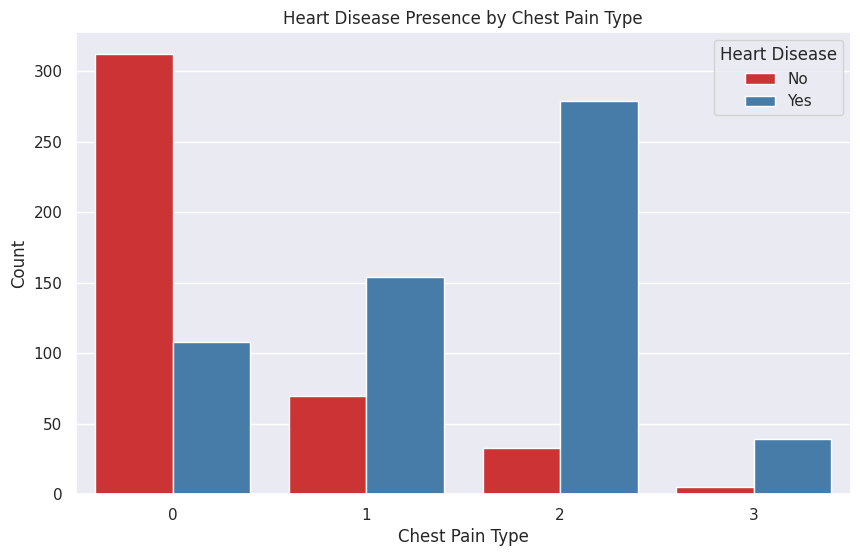

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='chestpain', hue='target', data=data, palette='Set1')
plt.title('Heart Disease Presence by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

In [ ]:
defects_count = len(data[data['noofmajorvessels'] == 3])
print(f"Number of Patients with Defects in All Three Major Vessels: {defects_count}")

Number of Patients with Defects in All Three Major Vessels: 116


In [ ]:
!pip install scikit-learn==1.0.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 37.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.17.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
import matplotlib.pyplot as plt

# Assuming 'XG' is your trained model
perm = PermutationImportance(xgb_model, random_state=1).fit(X_test, y_test)  # Pass the model, not predictions

eli5.show_weights(perm, feature_names=X_test.columns.tolist())

# Create horizontal bar chart with increased figure size
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(X_test.columns.tolist(), perm.feature_importances_)  # Horizontal bars
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance using Permutation Importance')
plt.gca().invert_yaxis()  # Arrange bars with most important feature at the top
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'eli5'

In [ ]:
average_resting_bp = data['restingBP'].mean()
print(f"Average Resting Blood Pressure: {average_resting_bp:.2f} mm Hg")

In [ ]:
print(f"The patients age range is {data['age'].min()} to {data['age'].max()} years.")